In [ ]:
# https://machinelearningmastery.com/deep-learning-with-pytorch-9-day-mini-course/

In [1]:
import matplotlib.pyplot as plt

In [3]:
import torch

In [4]:
print(torch.__version__)

2.0.1+cu117


In [5]:
import torch.nn as nn

In [6]:
import torchvision

In [7]:
from torchvision.datasets import CIFAR10

In [8]:
import torch.optim as optim

In [9]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
batch_size = 24

In [9]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

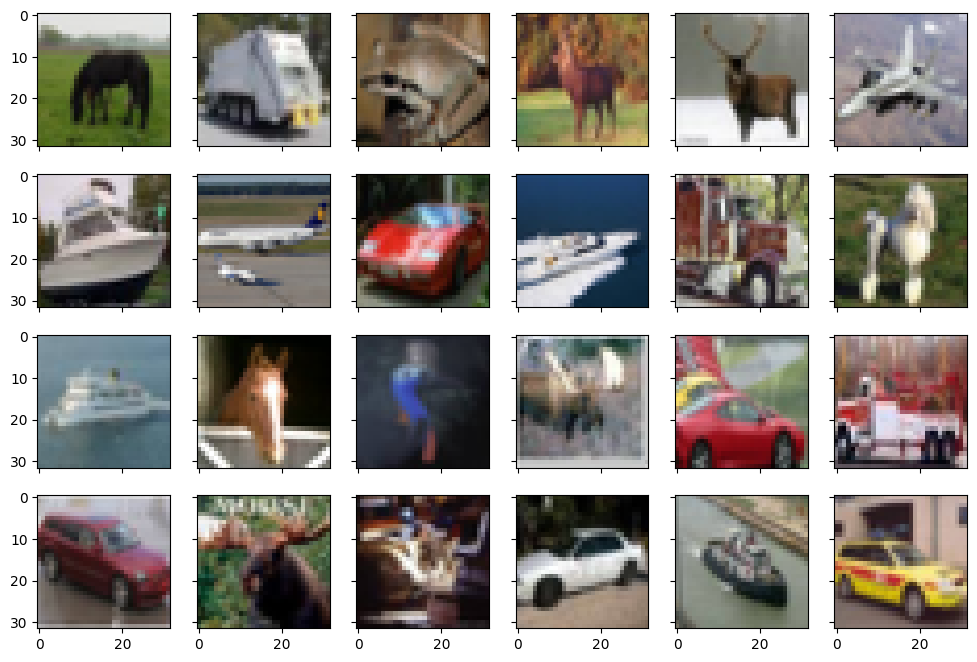

In [10]:
fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6
        ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
    break  # take only the first batch
plt.show()

In [11]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2)),
    nn.Flatten(),
    nn.Linear(8192, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)

In [12]:
print(model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# uncomment the next two lines for GPU-based training
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model.to(device)

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [15]:
n_epochs = 20

In [16]:
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 37.48%
Epoch 1: model accuracy 44.23%
Epoch 2: model accuracy 48.22%
Epoch 3: model accuracy 52.23%


KeyboardInterrupt: 